In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv("naukri_jobs.csv")

In [3]:
df.head(5)

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [4]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

In [5]:
df.describe()

,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
count,30000,30000,29425,29950,29427,28729,27695,29423,29427,29427,29099
unique,30000,28865,23884,1258,256,26909,206,2573,72,122,649
top,db425fc3498bf6e5f2cc6f3ea8babd78,2019-08-04 02:01:21 +0000,Sales Executive,Not Disclosed by Recruiter,2 - 5 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,Programming & Design,Bengaluru,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer
freq,1,5,120,19731,2002,102,8551,4986,7400,10012,6396


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
Uniq Id                    30000 non-null object
Crawl Timestamp            30000 non-null object
Job Title                  29425 non-null object
Job Salary                 29950 non-null object
Job Experience Required    29427 non-null object
Key Skills                 28729 non-null object
Role Category              27695 non-null object
Location                   29423 non-null object
Functional Area            29427 non-null object
Industry                   29427 non-null object
Role                       29099 non-null object
dtypes: object(11)
memory usage: 2.5+ MB


In [7]:
experiance=df["Job Experience Required"]

In [8]:
exp=experiance[0]

In [9]:
exp

'5 - 10 yrs'

In [10]:
import re
def convert_yrs(exp):
    try:
        exp=str(exp)
        exp=exp.replace(" ","")
        m=re.match("\d+-\d+",exp)
        s=m.group()
        a,b=s.split("-")
        l=[i for i in range(int(a),int(b)+1)]
        return l
    except:
        try :
            exp=str(exp)
            exp=exp.replace(" ","")
            m=re.match("\d+",exp)
            s=m.group()
            if int(s) == 0:
                l=[0]
            else:
                l=[i for i in range(int(s))]
            return l
        except:
            pass
        

In [11]:
experience_req=[]
for exp in experiance:
    try:
        experience_req.append(convert_yrs(exp))
    except:
        pass

In [12]:
def convert_salary(salary):
    salary=str(salary)
    salary=salary.replace(" ","")
    if not salary.isalpha():
        #print("INNNNN-"+str(salary))
    
        try:
            salary=salary.replace(",","")
            m=re.findall("\d+-\d+",salary)
            s=m[0]
            min_salary,max_salary=s.split("-")
            return min_salary,max_salary
        except:
            try:
                opening,sal=salary.split(":")
                return 100000
            except:
                try:
                    m=re.match("INR\d+PA",salary)
                    if m :
                        m=re.findall("\d+-",salary)
                        s=m[0]
                        print(s)
                        return s
                except:
                    try:
                        m=re.search("\d+PA",salary)
                        s=m[0]
                        #print(salary)
                        #print(s)
                        return s
                    except:
                        #print(salary)
                        return salary
    
                
     
    else:
        return salary

In [13]:
job_salary=df["Job Salary"]

In [14]:
job_alter_salary=[]
for salary in job_salary:
    job_alter_salary.append(convert_salary(salary))

In [15]:
df["Job Experience Required"]=experience_req

In [16]:
df["Job Salary"]=job_alter_salary

In [17]:
locations=df["Location"]

In [18]:
location_string=""
for location in locations:
    location_string=location_string+str(location)+","

In [19]:
new_locations=location_string.split(",")

In [20]:
new_df=pd.DataFrame(new_locations)

In [21]:
new_df[0].value_counts()

Bengaluru                          6402
Mumbai                             4883
Pune                               3263
Hyderabad                          2999
Gurgaon                            2754
                                   ... 
 Vasai)                               1
Delhi NCR (Alaknanda)                 1
Sales Bangaluru                       1
Bengaluru (Chikka Bommasandra)        1
Delhi NCR (Sector-64 Noida)           1
Name: 0, Length: 1182, dtype: int64

In [22]:
df['Location'].value_counts()

Bengaluru                                                                       4986
Mumbai                                                                          3318
Pune                                                                            2431
Hyderabad                                                                       2144
Gurgaon                                                                         1715
                                                                                ... 
Bengaluru,Chennai,Hyderabad,Pune,Chandigarh,Delhi,Gurgaon,Jaipur,Trivandrum        1
Delhi NCR,Agra,Varanasi,Ludhiana,Lucknow,Allahabad,Navi Mumbai,Gurgaon,Noida       1
Coimbatore,Bengaluru,Madurai,Chennai                                               1
Shimla,Jaipur,Lucknow,Delhi,Chandigarh,haryana,punjab                              1
Hyderabad,Jaipur                                                                   1
Name: Location, Length: 2573, dtype: int64

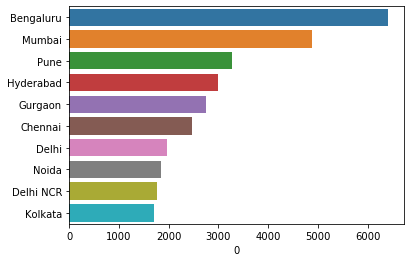

In [23]:
sns.barplot(x=new_df[0].value_counts()[0:10],y=new_df[0].value_counts()[0:10].index)

In [24]:
key_skills=df["Key Skills"]
len(key_skills)

30000

In [25]:
key_skils_string=""
for skill in key_skills:
    key_skils_string=key_skils_string+str(skill)+"|"

In [26]:
new_key_skills=key_skils_string.split("|")

In [27]:
len(new_key_skills)

250354

In [28]:
new_skill=pd.DataFrame(new_key_skills)
new_skill[0].value_counts()

Manager                 2774
Developer               2467
Executive               1443
 Javascript             1366
Sales                   1354
                        ... 
fraud control              1
 sql tuning                1
 SAINT                     1
 People                    1
 claims adjudication       1
Name: 0, Length: 28151, dtype: int64

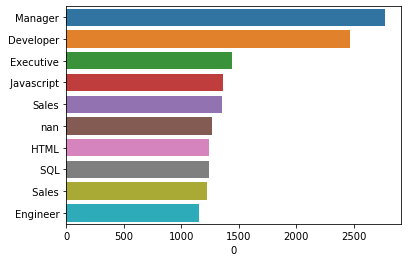

In [29]:
sns.barplot(x=new_skill[0].value_counts()[0:10],y=new_skill[0].value_counts()[0:10].index)

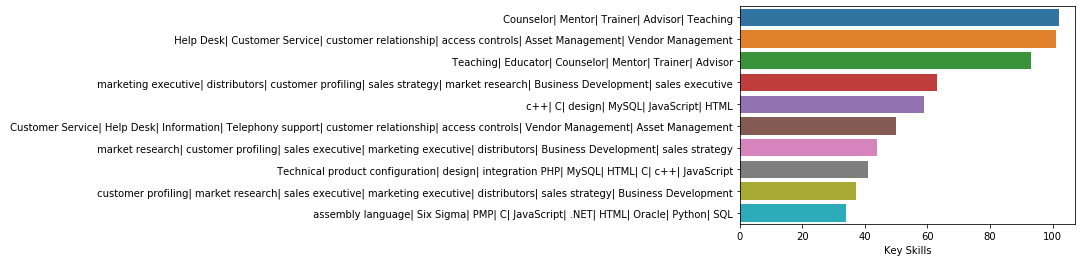

In [30]:
sns.barplot(x=df["Key Skills"].value_counts()[0:10],y=df["Key Skills"].value_counts()[0:10].index)

In [31]:
exp=df["Job Experience Required"]


In [32]:
new_ex=[]
for e in exp:
    if e != None:
        new_ex.extend(e)

In [33]:
new_job_exp=pd.DataFrame(new_ex)

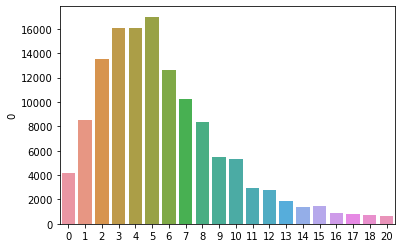

In [34]:
sns.barplot(x=new_job_exp[0].value_counts()[0:20].index,y=new_job_exp[0].value_counts()[0:20])

In [35]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

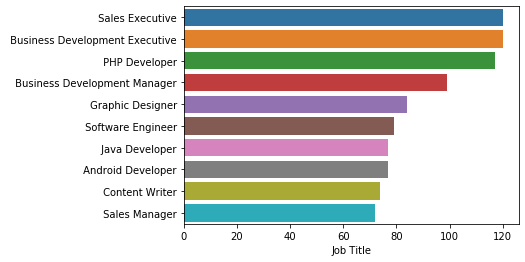

In [36]:
sns.barplot(x=df["Job Title"].value_counts()[0:10],y=df["Job Title"].value_counts()[0:10].index)

In [38]:
alter_sal=[]
for sal in job_alter_salary:
    if sal != "NotDisclosedbyRecruiter" and sal != None and sal != "Notdisclosed":
        try:
            l=[i for i in range(int(sal[0]),int(sal[1]),100000)]
            alter_sal.extend(l)
        except:
            alter_sal.extend(l)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

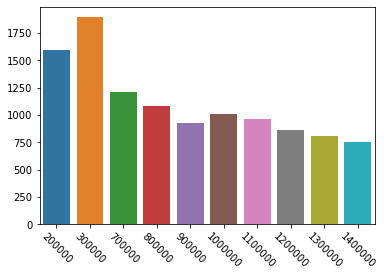

In [39]:
Counter(alter_sal).keys
g=sns.barplot(x=list(Counter(alter_sal).keys())[0:10],y=list(Counter(alter_sal).values())[0:10])
plt.xticks(rotation=-45)

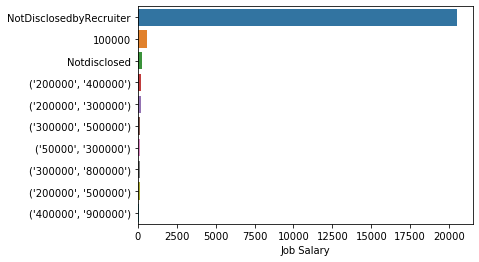

In [40]:
sns.barplot(x=df["Job Salary"].value_counts()[0:10],y=df["Job Salary"].value_counts()[0:10].index)

In [41]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Job Title', 'Job Salary',
       'Job Experience Required', 'Key Skills', 'Role Category', 'Location',
       'Functional Area', 'Industry', 'Role'],
      dtype='object')

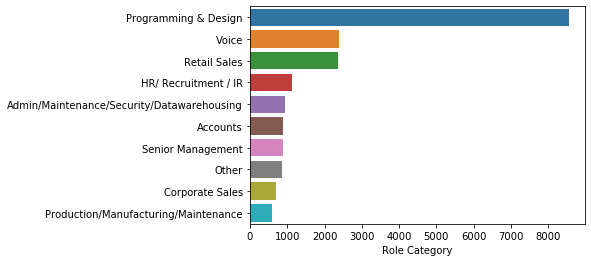

In [42]:
sns.barplot(x=df["Role Category"].value_counts()[0:10],y=df["Role Category"].value_counts()[0:10].index)

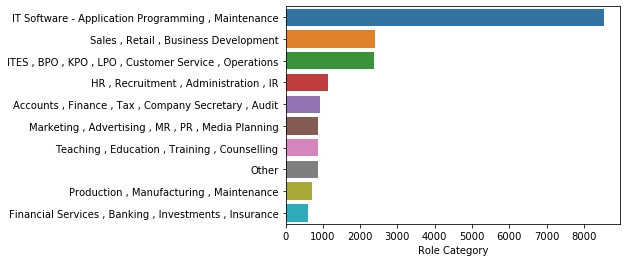

In [43]:
sns.barplot(x=df["Role Category"].value_counts()[0:10],y=df["Functional Area"].value_counts()[0:10].index)

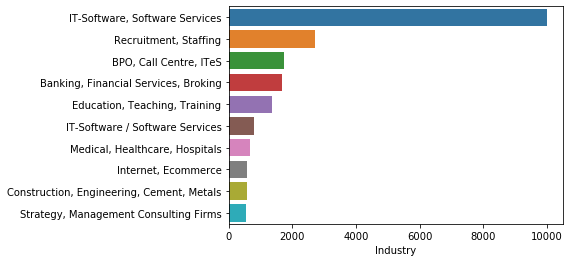

In [44]:
sns.barplot(x=df["Industry"].value_counts()[0:10],y=df["Industry"].value_counts()[0:10].index)

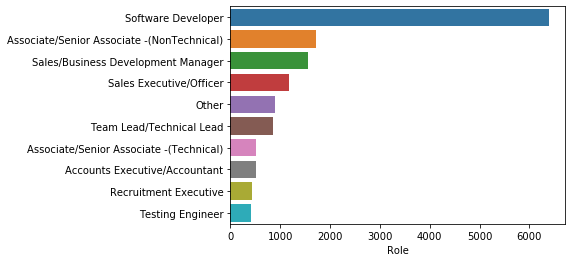

In [45]:
sns.barplot(x=df["Role"].value_counts()[0:10],y=df["Role"].value_counts()[0:10].index)